In [9]:
import matplotlib.pyplot as plt
import wfdb

In [10]:
db_path = 'mit-bih-arrhythmia-database-1.0.0/'
record = wfdb.rdsamp(f'{db_path}107', sampto=3000)
annotation = wfdb.rdann(f'{db_path}107', 'atr', sampto=3000)

In [11]:
record[0]

array([[-2.045, -1.245],
       [-2.045, -1.245],
       [-2.045, -1.245],
       ...,
       [-0.645,  0.   ],
       [-0.63 ,  0.01 ],
       [-0.63 , -0.015]])

In [12]:
record[1]

{'fs': 360,
 'sig_len': 3000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V1'],
 'comments': ['63 M 1340 167 x1',
  'Digoxin',
  'Complete heart block is present. The PVCs are multiform.']}

Text(0, 0.5, 'Lead II')

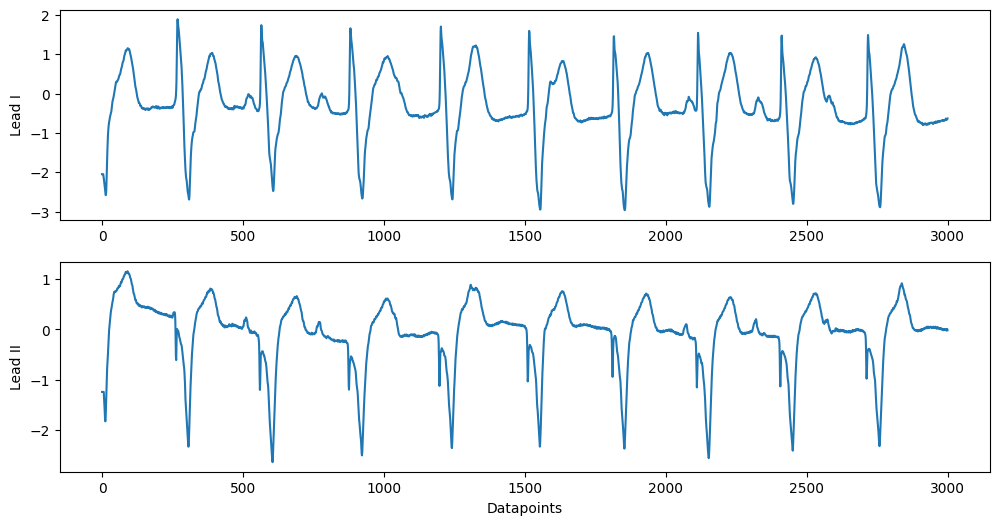

In [13]:
fig, ax = plt.subplots(nrows=2, figsize=(12, 6))
I = record[0][:, 0]
II = record[0][:, 1]

ax[0].plot(I)
ax[1].plot(II)
ax[0].set_ylabel('Lead I')
ax[1].set_xlabel('Datapoints')
ax[1].set_ylabel('Lead II')

In [14]:
num_male_records = 0
num_female_records = 0
age = []
for record_name in range(100, 235):
    try:
        record = wfdb.rdrecord(f'mit-bih-arrhythmia-database-1.0.0/{record_name}')
    except FileNotFoundError:
        print(f'\033[90mNo such record: {record_name}\033[0m')
    record_info = record.comments[0]
    age.append(int(record_info[0:2]))
    if ' M ' in record_info:
        num_male_records += 1
    else:
        num_female_records += 1

age = [i for i in age if i != -1]

No such record: 110
No such record: 120
No such record: 125
No such record: 126
No such record: 127
No such record: 128
No such record: 129
No such record: 130
No such record: 131
No such record: 132
No such record: 133
No such record: 134
No such record: 135
No such record: 136
No such record: 137
No such record: 138
No such record: 139
No such record: 140
No such record: 141
No such record: 142
No such record: 143
No such record: 144
No such record: 145
No such record: 146
No such record: 147
No such record: 148
No such record: 149
No such record: 150
No such record: 151
No such record: 152
No such record: 153
No such record: 154
No such record: 155
No such record: 156
No such record: 157
No such record: 158
No such record: 159
No such record: 160
No such record: 161
No such record: 162
No such record: 163
No such record: 164
No such record: 165
No such record: 166
No such record: 167
No such record: 168
No such record: 169
No such record: 170
No such record: 171
No such record: 172


Gender ratio

Number of Male Records: 111
Number of Female Records: 24


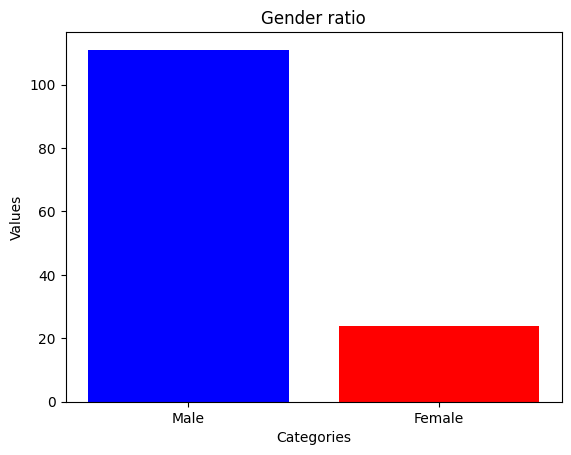

In [15]:
# Number of Male Records: 111
print("Number of Male Records:", num_male_records)
# Number of Female Records: 24
print("Number of Female Records:", num_female_records)

categories = ['Male', 'Female']
values = [num_male_records, num_female_records]
colors = ['blue', 'red']

plt.bar(categories, values, color=colors)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Gender ratio')

plt.show()

Age

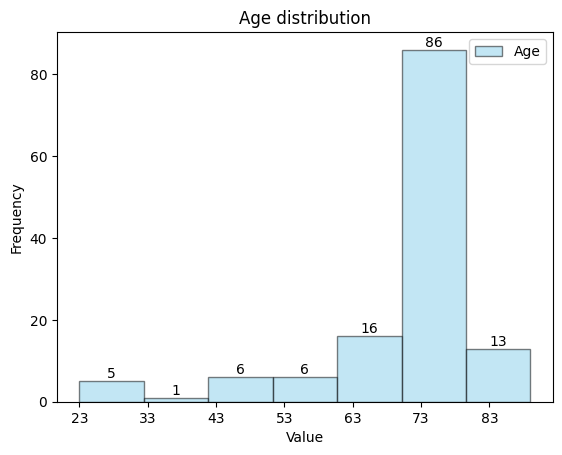

In [16]:
counts, edges, bars = plt.hist(age, bins=7, color='skyblue', alpha=0.5, label='Age', edgecolor='black')

plt.xlabel('Value')
plt.xticks(range(min(age), max(age) + 1, 10))
plt.ylabel('Frequency')
plt.title('Age distribution')

plt.bar_label(bars)

plt.legend()
plt.show()

Aya

In [17]:
import os

def extract_arrhythmia_type(annotation_path):
    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith('#'):
                arrhythmia_info = line.split(',')
                if len(arrhythmia_info) > 1:
                    arrhythmia_type = arrhythmia_info[1].strip()
                    return arrhythmia_type
    return None

arrhythmia_types = {}

for record_name in range(100, 235):
    annotation_path = f'mit-bih-arrhythmia-database-1.0.0/{record_name}.hea'
    if os.path.exists(annotation_path):
        arrhythmia_type = extract_arrhythmia_type(annotation_path)
        if arrhythmia_type:
            arrhythmia_types[record_name] = arrhythmia_type
        else:
            print(f"No arrhythmia type found for record {record_name}")

print(arrhythmia_types)

No arrhythmia type found for record 101
No arrhythmia type found for record 102
No arrhythmia type found for record 106
No arrhythmia type found for record 107
No arrhythmia type found for record 109
No arrhythmia type found for record 113
No arrhythmia type found for record 114
No arrhythmia type found for record 115
No arrhythmia type found for record 116
No arrhythmia type found for record 117
No arrhythmia type found for record 119
No arrhythmia type found for record 210
No arrhythmia type found for record 212
No arrhythmia type found for record 215
No arrhythmia type found for record 219
No arrhythmia type found for record 220
No arrhythmia type found for record 223
No arrhythmia type found for record 230
No arrhythmia type found for record 233
No arrhythmia type found for record 234
{100: 'Inderal', 103: 'Xyloprim', 104: 'Pronestyl', 105: 'Nitropaste', 108: 'Quinaglute', 111: 'Lasix', 112: 'Pronestyl', 118: 'Norpace', 121: 'Isordil', 122: 'Lasix', 123: 'Inderal', 124: 'Isordil', 

In [18]:
import os
import pandas as pd

def extract_info_from_comment(comment):
    parts = comment.split()
    gender = None
    age = None
    medicine = []

    for part in parts:
        if part.lower() in ['m', 'f']:
            gender = part
        else:
            try:
                age = int(part)
            except ValueError:
                if not part.startswith('#'):
                    medicine.append(part)

    return gender, age, ' '.join(medicine)

def extract_record_info(annotation_path):
    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith('#'):
                gender, age, medicine = extract_info_from_comment(line)
                if gender is not None or age is not None or medicine:
                    return gender, age, medicine
    return None, None, None

# Create DataFrame
data = []

for record_name in range(100, 236):
    annotation_path = f'mit-bih-arrhythmia-database-1.0.0/{record_name}.hea'
    if os.path.exists(annotation_path):
        arrhythmia_type = extract_arrhythmia_type(annotation_path)
        gender, age, medicine = extract_record_info(annotation_path)
        data.append({
            'Record Number': record_name,
            'Age': age,
            'Gender': gender,
            'Medicine': medicine,
            'Arrhythmia Type': arrhythmia_type
        })

df = pd.DataFrame(data)
print(df)

    Record Number   Age Gender Medicine                     Arrhythmia Type
0             100  1629      M       x1                             Inderal
1             101   654      F       x1                                None
2             102   167      F       x1                                None
3             103   654      M       x1                            Xyloprim
4             104   694      F       x1                           Pronestyl
5             105  1629      F       x1                          Nitropaste
6             106   654      F       x1                                None
7             107   167      M       x1                                None
8             108   654      F       x1                          Quinaglute
9             109   694      M       x1                                None
10            111   167      F       x1                               Lasix
11            112   654      M       x2                           Pronestyl
12          